In [1]:
import networkx as nx
import pandas as pd
import networkx.algorithms.community as nx_comm

In [2]:
df = pd.read_csv(r'./data/Delicious/trust_data.csv')
df

,userID,contactID,Trust
0,8,28371,1
1,8,40306,1
2,8,85279,1
3,8,91764,1
4,8,97723,1
...,...,...,...
15323,108035,70991,1
15324,108035,75540,1
15325,108035,77247,1
15326,108035,84469,1


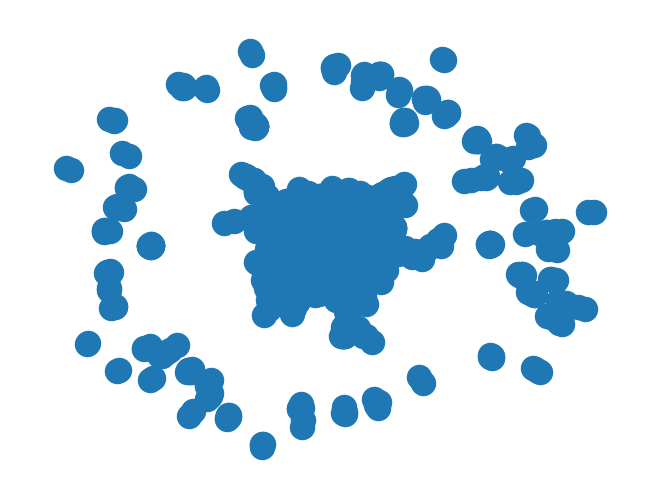

In [3]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df,source='userID',target="contactID", edge_attr='Trust', create_using=Graphtype)
nx.draw(G)

In [4]:
list_commu = nx_comm.louvain_communities(G, seed=123)
list_commu

[{8,
  13102,
  24770,
  28371,
  40306,
  67926,
  85279,
  91764,
  94895,
  96666,
  97723,
  105468,
  106690},
 {147,
  19354,
  22728,
  27421,
  30118,
  31053,
  33163,
  35908,
  38536,
  38853,
  44414,
  45368,
  50538,
  54173,
  56555,
  56742,
  60219,
  70781,
  72740,
  73561,
  75061,
  78003,
  87499,
  88108,
  89560,
  90442,
  91138,
  93282,
  94771,
  99246,
  105832},
 {233, 2716},
 {259, 11568},
 {302, 8232, 28061},
 {538, 16972},
 {934,
  2300,
  22791,
  24346,
  25515,
  30201,
  35259,
  40146,
  43204,
  49058,
  49408,
  53002,
  54425,
  57359,
  72005,
  72574,
  74053,
  75998,
  79828,
  81392,
  94012,
  104426,
  105759},
 {1016, 40625, 66073, 83675, 87923, 92302},
 {1094, 102129},
 {1296, 22563},
 {1505, 19634, 54473, 62398, 104768},
 {1887, 6888, 6897, 61581, 77671, 91905, 94028},
 {3568,
  4135,
  7461,
  10949,
  13936,
  14666,
  15012,
  17684,
  26018,
  27380,
  27466,
  28564,
  32715,
  37550,
  38271,
  39091,
  41685,
  45497,
  48552,
 

In [5]:
def find_user_community(user:int, list_commu: list):
    for i in range(len(list_commu)):
        if user in list_commu[i] :
            ind = i
    return ind

In [6]:
#test user 8
user = 8
commu = find_user_community(user, list_commu)
commu

0

In [7]:
#find if users in list_followers are in commu
def find_followers_in_community(user:int,commu:int, list_followers:list, list_commu:list):
    list_followers_in_commu = [f for f in list_followers if f in list_commu[commu]]
    return list_followers_in_commu

In [8]:
l = find_followers_in_community(8,find_user_community(8,list_commu),[24770,13102,147], list_commu)
l

[24770, 13102]

In [9]:
def top_k(community : int, list_commu : list, k : int):
    top_k = []
    for i in range(k): #init list
        top_k.append((None,0))

    for user in list_commu[community]:
        nb_contacts = len(df.loc[df["userID"] == user, "contactID"])
        if nb_contacts > top_k[0][1]:
            top_k[0] = (user,nb_contacts)
            top_k = sorted(top_k, key=lambda x: x[1])
    return top_k

In [10]:
print(top_k(0, list_commu,5))

[(91764, 11), (94895, 11), (13102, 11), (40306, 12), (106690, 12)]


In [37]:
# take second element for sort
def takeSecond(elem):
    return elem[1]

In [52]:
def top_k_followers(user:int,list_followers, list_commu : list, k : int, df):
    top_k = []
    commu = find_user_community(user, list_commu)
    list_followers_in_commu = find_followers_in_community(user, commu,list_followers,list_commu)

    for follower in list_followers_in_commu:
        nb_contacts = len(df.loc[df["userID"] == follower, "contactID"])
        top_k.append((follower,nb_contacts))
    
    top_k.sort(key=takeSecond,reverse=True)
    if len(top_k)<k:
        return top_k
    else:
        return top_k[0:k]

In [53]:
top_k_followers = top_k_followers(8,[24770,13102,147,91764,94895,106690,40306,97723], list_commu,4, df)
top_k_followers

[(106690, 12), (40306, 12), (13102, 11), (91764, 11)]